# HI experiment with horn antenna

<ipython-input-2-0ad29290e9a5>:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("power_freq.pdf",overwrite=True)


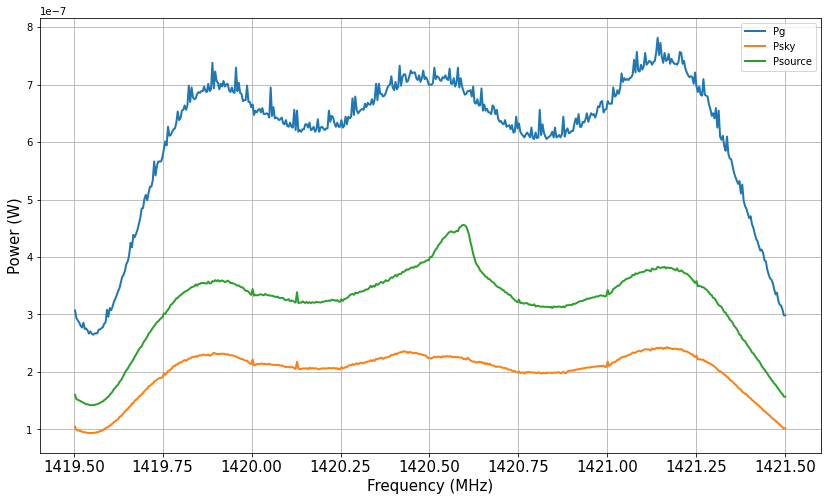

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ground

test = np.genfromtxt('power_g.txt', delimiter=',')
test = test
d = (10**(test / 10)) / 1000
n = len(test)
x = np.linspace(1419.5, 1421.5, n)
Pg = d

# sky
test1 = np.genfromtxt('power_sky.txt', delimiter=',')
test1 = test1
d1 = (10**(test1 / 10)) / 1000
n1 = len(test1)
x1 = np.linspace(1419.5, 1421.5, n1)
Psky = d1

# source
test11 = np.genfromtxt('power_s.txt', delimiter=',')
test11 =test11
d11 = (10**(test11 / 10)) / 1000
n11 = len(test11)
x11 = np.linspace(1419.5, 1421.5, n11)
Psource = d11

# Plot
plt.figure(figsize=(14,8))
plt.plot(x, Pg, linewidth=2, label='Pg')
plt.grid(True)
plt.plot(x, Psky, linewidth=2, label='Psky')
plt.plot(x, Psource, linewidth=2, label='Psource')
plt.xlabel('Frequency (MHz)',fontsize=15)
plt.ylabel('Power (W)',fontsize=15)
plt.legend()
plt.xticks(fontsize=15)
plt.savefig("power_freq.pdf",overwrite=True)



<ipython-input-3-2144191b6493>:23: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("temp_freq.pdf",overwrite=True)


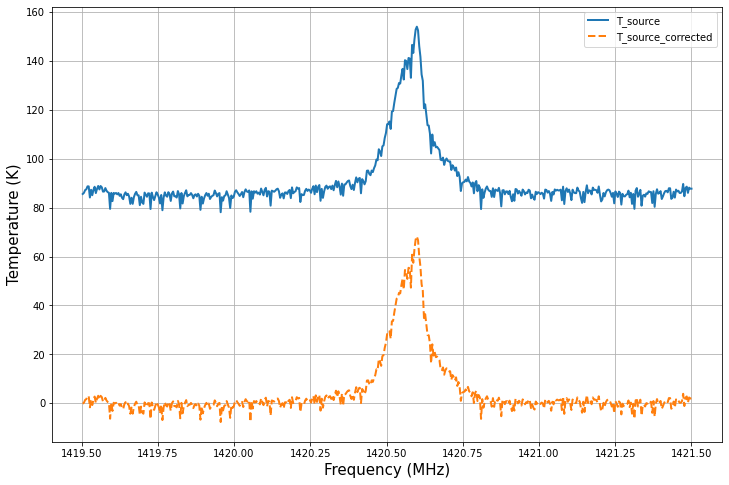

In [3]:

Tsky = 5
Tg = 300
plt.figure(figsize=(12, 8))

y = Pg / Psky
y1=Pg/Psource
Tr = ((y * Tsky) - Tg) / (1 - y)
x_new = np.arange(1, len(Tr) + 1)
Tsource = ((Tg + Tr)/y1) - Tr

plt.plot(x, Tsource, linewidth=2, label='T_source')
plt.xlabel('Frequency (MHz)',fontsize=15)
plt.ylabel('Temperature (K)',fontsize=15)



Tb = Tsource - np.mean(Tsource[1:3])

plt.plot(x, Tb, linewidth=2, label='T_source_corrected',linestyle='--')
plt.grid(True)

plt.legend()
plt.savefig("temp_freq.pdf",overwrite=True)

In [4]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit


# peak_index = 212  
# region_width = 20 

# # Determine the range of indices for the specified region
# peak_start_index = max(0, peak_index - region_width)
# peak_end_index = min(len(Tr) - 1, peak_index + region_width)

# def horizontal_line(x, constant):
#     return constant

# # Fit a horizontal line to the specified region
# x_peak = np.arange(peak_start_index, peak_end_index)
# y_peak = Tr[peak_start_index:peak_end_index]

# # Use curve_fit to find the constant value for the horizontal line
# params, _ = curve_fit(horizontal_line, x_peak, y_peak)

# # Create the fitted line data
# Tr_fit = Tr.copy()
# Tr_fit[peak_start_index:peak_end_index] = horizontal_line(x_peak, 140)

# # Plot Tr and Tr_fit
# plt.figure(figsize=(10, 6))
# plt.plot(x,Tr, label='Tr', linewidth=2)
# plt.plot(x,Tr_fit, label='Tr_fit', color='red', linestyle='--', linewidth=2)

# plt.xlabel('Index')
# plt.ylabel('Temperature')
# plt.title('Tr and Tr_fit')
# plt.legend()
# plt.grid(True)

# plt.show()


In [11]:
from __future__ import print_function, division
from PyAstronomy import pyasl
import math

import datetime
# Coordinates of telescope
longitude = 73.8253
latitude = 18.5593
altitude = 554

hd1 = "17 49 29 -28 15 46.5"
obs_ra_2000, obs_dec_2000 = pyasl.coordsSexaToDeg(hd1)
dt = datetime.datetime(2023, 9, 3, 15, 33, 55)
jd = pyasl.jdcnv(dt)

corr, hjd = pyasl.helcorr(longitude, latitude, altitude,
obs_ra_2000, obs_dec_2000, jd, debug=True)

#  LSR correction
v_sun = 20.5 
# peculiar velocity (km/s) of sun w.r.t. LSR(The Solar Apex. Nature 162, 920 (1948).https://doi.org/10.1038/162920a0)
sun_ra = math.radians(270.2)
sun_dec = math.radians(28.7)
obs_dec = math.radians(obs_dec_2000)
obs_ra = math.radians(obs_ra_2000)

a = math.cos(sun_dec) * math.cos(obs_dec)
b = (math.cos(sun_ra) * math.cos(obs_ra)) + (math.sin(sun_ra)
* math.sin(obs_ra))
c = math.sin(sun_dec) * math.sin(obs_dec)
v_rs = v_sun * ((a * b) + c)
v_lsr = -corr + v_rs
print("LSR correction [km/s]: ", v_lsr)
print("Positive value means receding (redshift) source,negative value means approaching (blueshift) source")



----- HELCORR.PRO - DEBUG INFO - START ----
(obs_long (East positive),obs_lat,obs_alt) Observatory coordinates [deg,m]:  73.8253 18.5593 554
(ra,dec) Object coordinates (for epoch 2000.0) [deg]:  267.37083333333334 -28.262916666666666
(ra,dec) Object coordinates (precessed to epoch 2023.758219) [deg]:  267.74630566597114 -28.268551040754414
(ut) Universal time (middle of exposure) [hrs]:  15.565277773886919
(jd) Julian date (middle of exposure) (JD):  2460191.1485532406
(hjd) Heliocentric Julian date (middle of exposure) (HJD):  2460191.150293409
(gmst) Greenwich mean sidereal time [hrs]:  14.399557114140862
(lmst) Local mean sidereal time [hrs]:  19.32124378080755
(dlat) Latitude correction [deg]:  -416.93032237856863
(lat) Geocentric latitude of observer [deg]:  18.443486021561508
(r) Distance of observer from center of earth [m]:  6376589.689868745
(v) Rotational velocity of earth at the position of the observer [km/s]:  0.4649883078157614
(vdiurnal) Projected earth rotation and ea

<ipython-input-12-42ead9cfdbc9>:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "overwrite" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("temp_vel.pdf",overwrite=True)


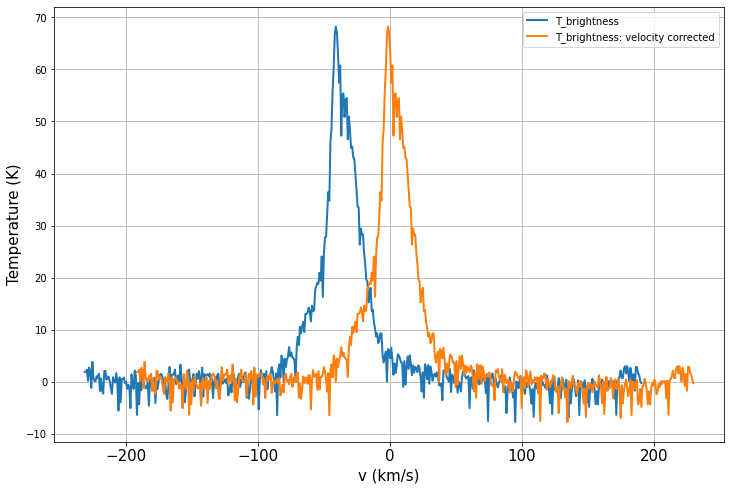

In [12]:
v = 299792.458 * (1 - x / 1420.4057511)
v_corr = v_lsr
v_new = v + v_corr

plt.figure(figsize=(12,8))
plt.plot(v, Tb, linewidth=2, label='T_brightness')
plt.plot(v_new, Tb, linewidth=2, label='T_brightness: velocity corrected')


plt.legend()
plt.xlabel('v (km/s)',fontsize=15)
plt.ylabel('Temperature (K)',fontsize=15)
plt.xlim
plt.grid(True)
plt.xticks(fontsize=15)
plt.savefig("temp_vel.pdf",overwrite=True)